# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Loading dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing data for training

In [3]:
X=data.iloc[:,1:5]
y=data.iloc[:,5]

In [4]:
#Splitting data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Creating model using RandomForestClassifier

In [5]:
classifier=RandomForestClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predicting values for our test set

In [6]:
y_pred=classifier.predict(X_test)

# Evaluating model prediction

In [7]:
print("Accuracy for test set is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy for test set is: 100.0 %


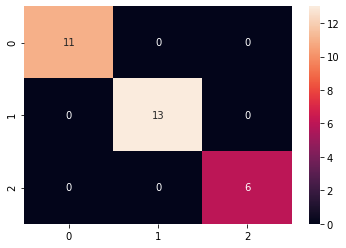

In [8]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [9]:
print("Accuracy for training set:",accuracy_score(y_train,classifier.predict(X_train))*100,"%")

Accuracy for training set: 100.0 %


Text(0.5, 1.0, 'Feature importance for the model')

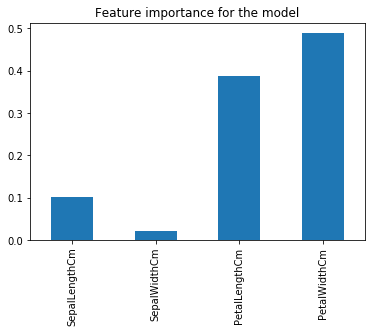

In [17]:
feature_imp=pd.Series(classifier.feature_importances_,index=X.columns)
feature_imp.plot(kind='bar')
plt.title('Feature importance for the model')

This shows that PetalWidthCm and PetalLengthCm are the two most important features

*Random Forest Classifier gives us 100% accuracy for both training and test set.